# Data quality report

In [1]:
# import libs
import ipywidgets as widgets
%matplotlib inline
%run ../src/visualization/check_processed_data.py

In [2]:
metafile = "../metadata/bomm1_per1.yml"
#                  year  mo  dy  hr  mn  ss 
date = dt.datetime(2018, 10, 16,  0, 20,  0)
self = Dashboard(metafile, number_of_minutes=10)
self.iowaga_region = "GLOBAL"
self.run(date);
self.get_data()

2018-10-16 00:20:00: Exception ocurred in function self.current_data() at line 684 ---> Error: Number of nans is more than 30%.


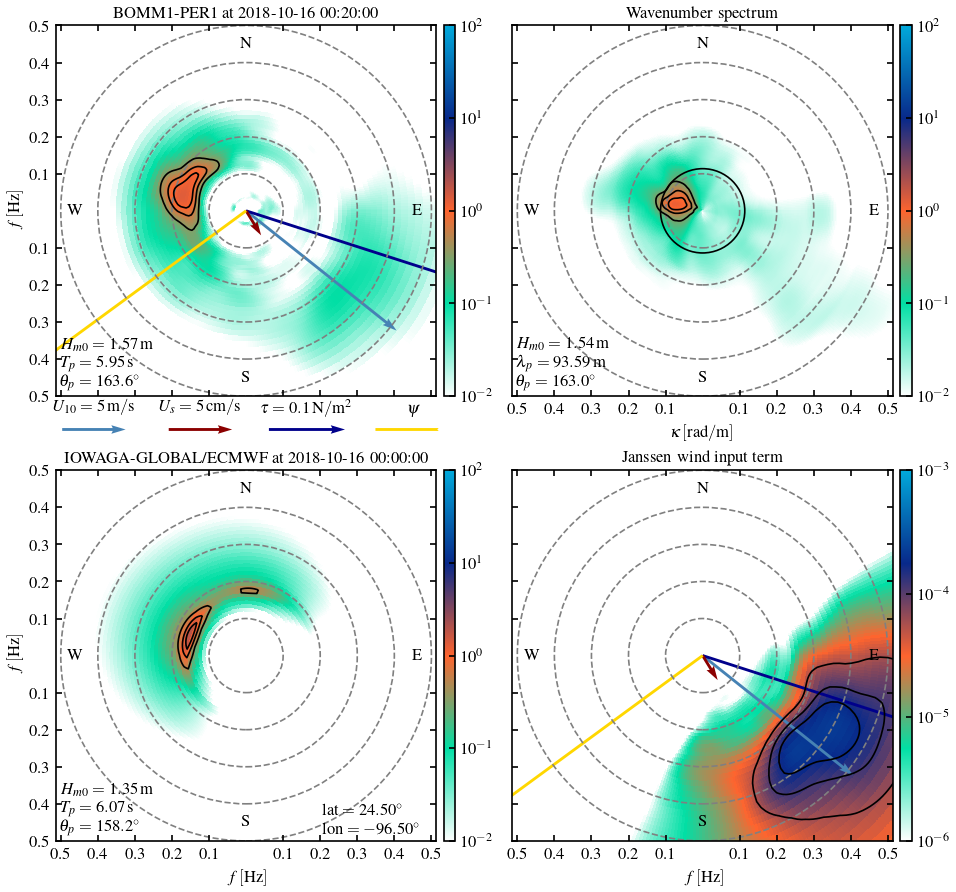

In [3]:
self.plot_spectra(kxky=False)

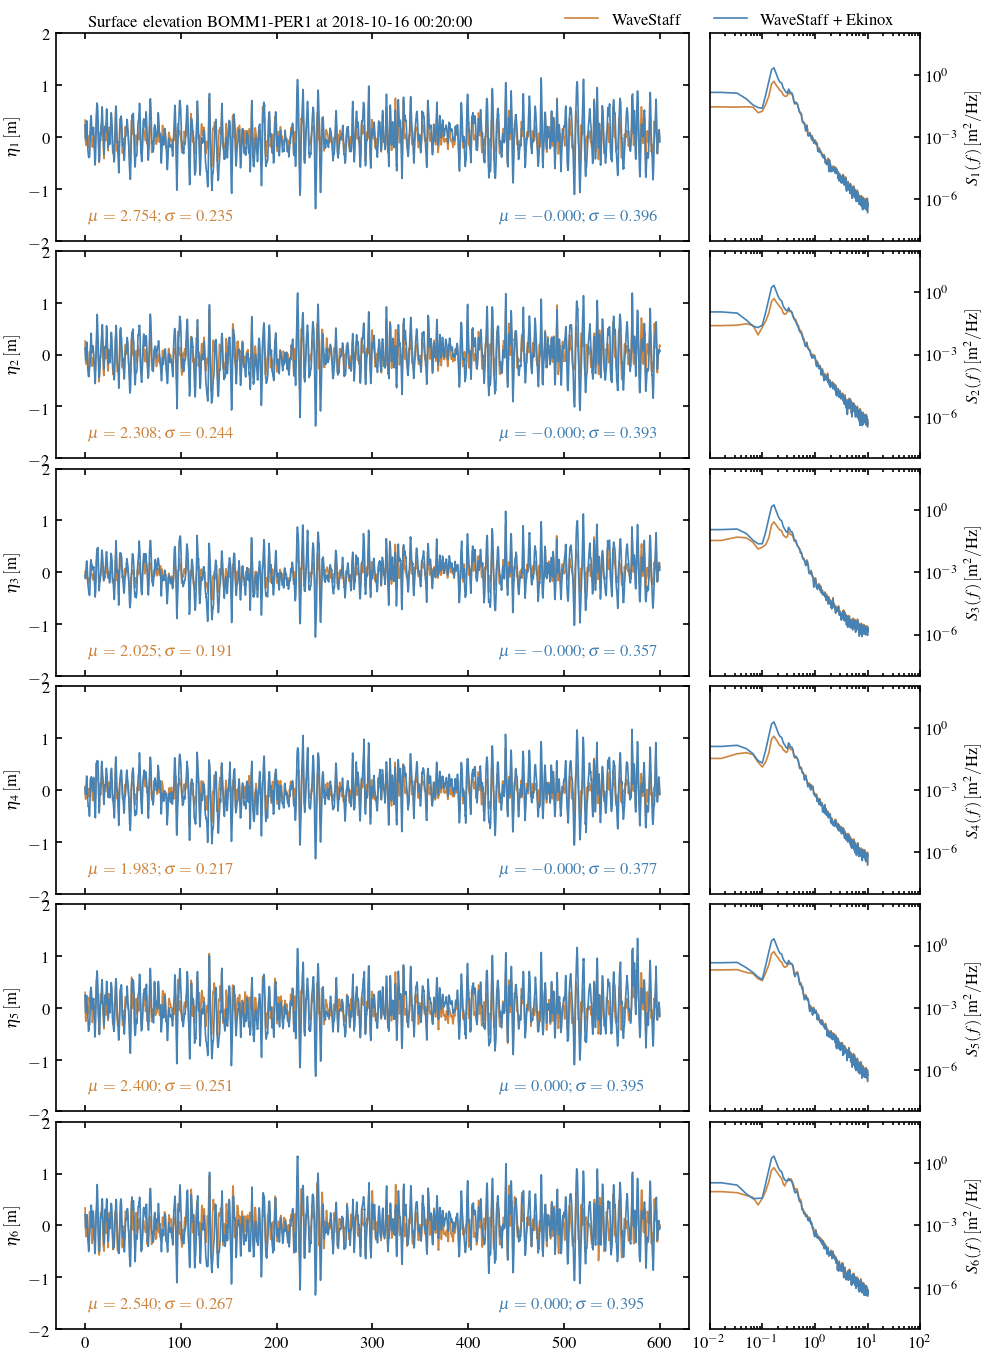

In [4]:
self.plot_surface_elevation(zomm_x=None, zomm_y=[-2,2])

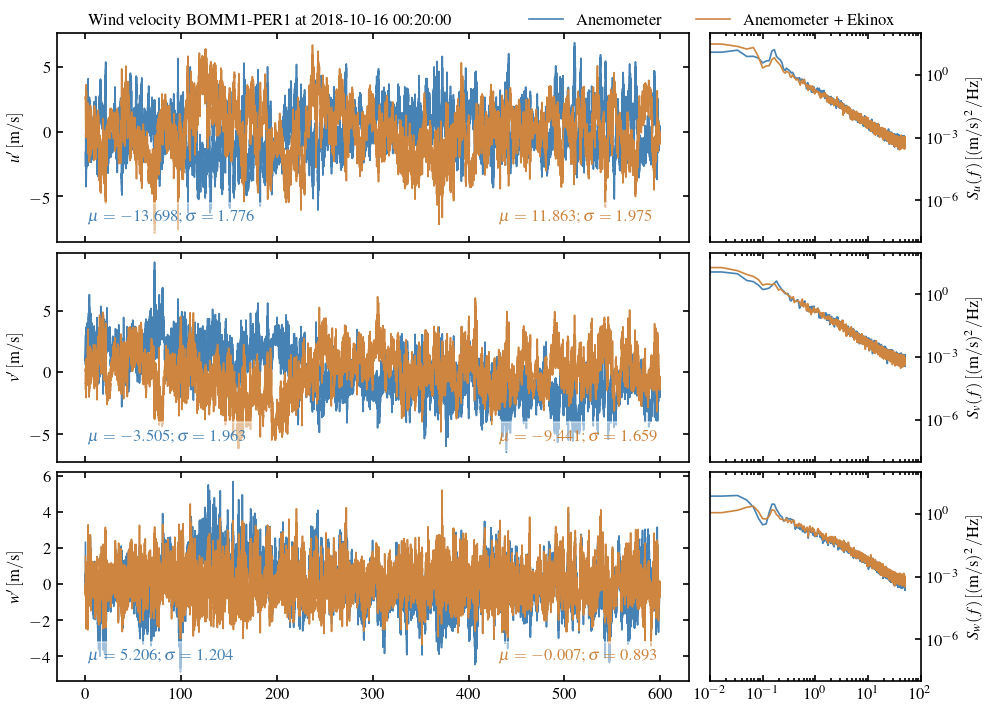

In [5]:
self.plot_wind_velocity(zomm_x=None, zomm_y=None)

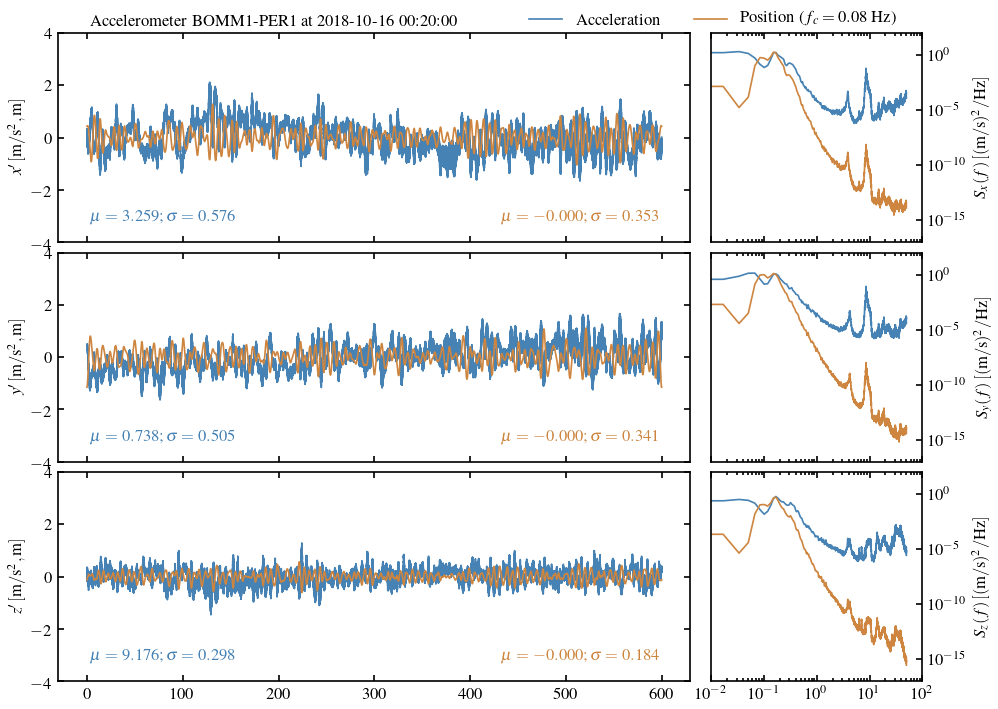

In [6]:
self.plot_buoy_accelerometer(zomm_x=None, zomm_y=[-4,4])

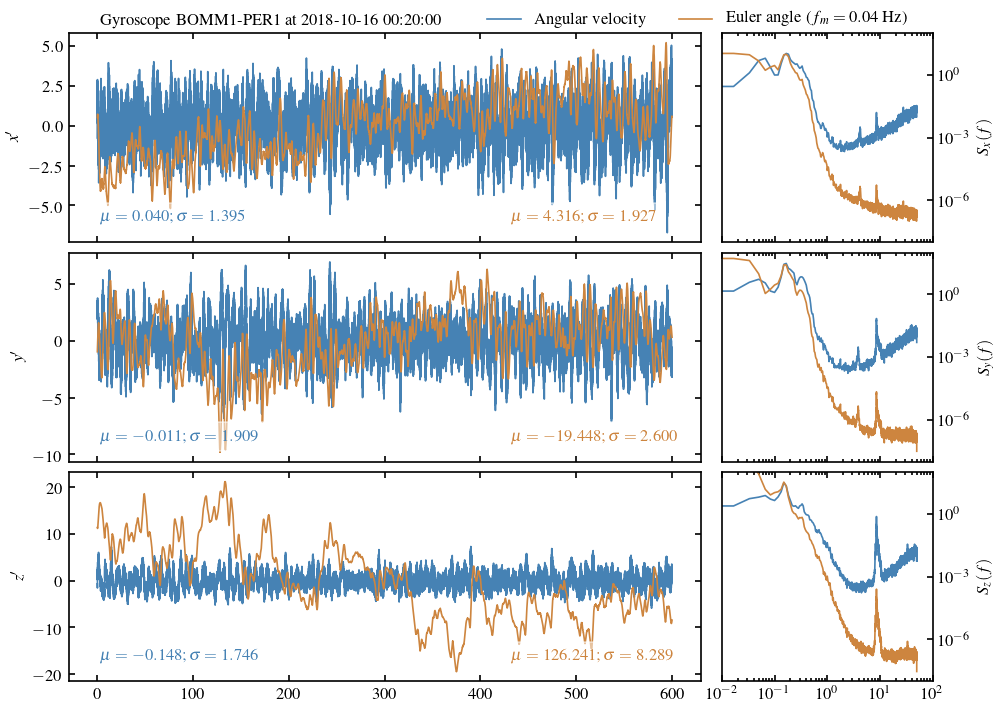

In [7]:
self.plot_buoy_gyroscope(zomm_x=None, zomm_y=None)

(<Figure size 960x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c0d732128>)

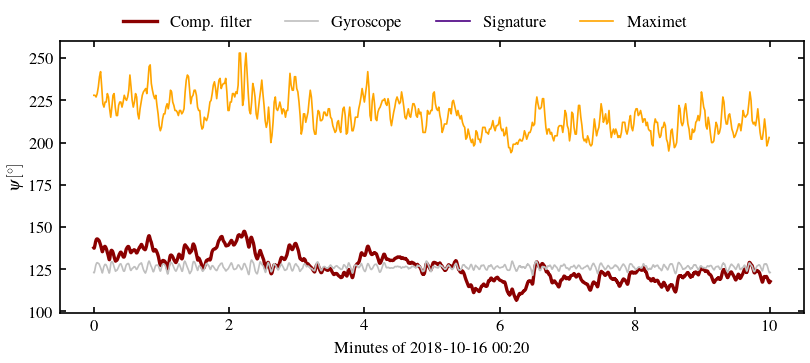

In [8]:
self.yaw_angle()

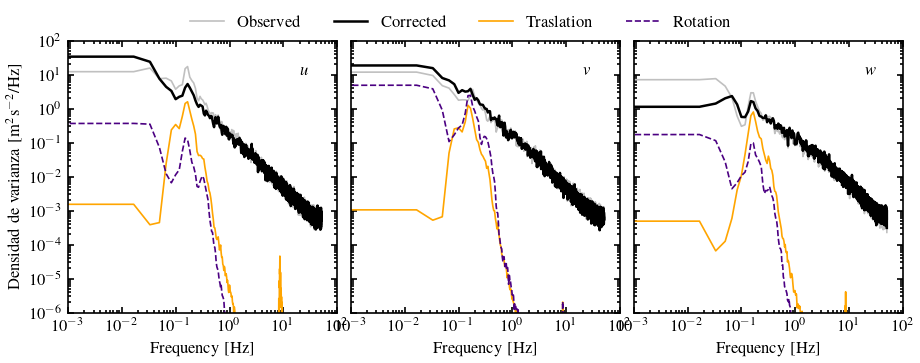

In [9]:
self.plot_wind_spectra()